In [3]:
!pip install yfinance
!pip install numpy_financial
!pip install tiingo


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn
import yfinance as yf
from tiingo import TiingoClient #pip install tiingo se manca il pacchetto su anaconda

capital=100000
config = {}
config['session'] = True
config['api_key'] = "fbb82277db40c7a1924d0a5bcf1d563bd21323cd"
client = TiingoClient(config)
capitale=100000#capitale iniziale

#ticker=["SPY","IJR","TLT"]
#df=yf.download(ticker ,start="2002-08-1",interval='1mo')["Adj Close"]

#df

In [5]:
df=client.get_dataframe(["SPY","IJR","TLT"],frequency='monthly',metric_name='adjClose',startDate='2002-08-01')#scarico i dati
df

,SPY,IJR,TLT
2002-08-30 00:00:00+00:00,60.984344,12.732640,42.472948
2002-09-30 00:00:00+00:00,54.589975,11.990290,44.278872
2002-10-31 00:00:00+00:00,59.081849,12.339160,42.644954
2002-11-29 00:00:00+00:00,62.726079,13.002140,42.254967
2002-12-31 00:00:00+00:00,59.173503,12.569849,44.167951
...,...,...,...
2023-08-31 00:00:00+00:00,446.932518,100.284317,95.120800
2023-09-29 00:00:00+00:00,425.750913,94.330000,87.561371
2023-10-31 00:00:00+00:00,416.508449,88.890000,82.782196
2023-11-30 00:00:00+00:00,454.553936,96.240000,90.991107


In [6]:
df_az=df[["SPY","IJR"]].copy()#copio i dati azionari in un dataframe
df_ob=df["TLT"].copy()#copio i dati obbligazionari in un dataframe


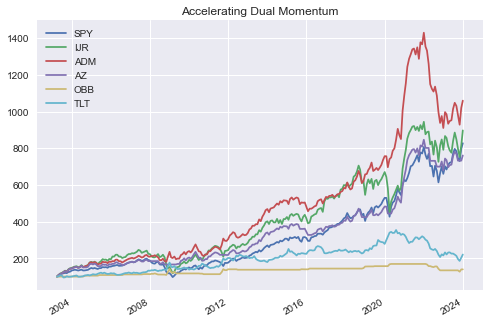

In [7]:
df_az_momentum=(df_az.pct_change()+df_az.pct_change(3)+df_az.pct_change(6)).shift().dropna()#calcolo il momentum a 1,3,6 mesi
df_az_rank=df_az_momentum.rank(axis=1,ascending=False).applymap(lambda x:0 if x>1 else 1)#faccio la classifica per vedere il più forte
df_azionario=(df_az_momentum>0).sum(axis=1).apply(lambda x:1 if x>=1 else 0)#applico il segnale all'azionario
df_obbligazionario=df_azionario.apply(lambda x:1 if x==0 else 0)#applico il segnale opposto all'obbligazionario
df_rendimento_az=((df_az_rank*df_az.pct_change()).sum(axis=1)*df_azionario)
df_rendimento_ob=(df_ob.pct_change()*df_obbligazionario).dropna()#sommo i rendimenti tra azionario e obbligazionario
df_az["ADM"]=((1+(df_rendimento_az+df_rendimento_ob)).cumprod()-1)*capitale+capitale#faccio la produttoria dei rendimenti sui soldi
df_az["AZ"]=((1+(df_rendimento_az)).cumprod()-1)*capitale+capitale
df_az["OBB"]=((1+(df_rendimento_ob)).cumprod()-1)*capitale+capitale
df_az["TLT"]=((1+(df_ob.pct_change())).cumprod()-1)*capitale+capitale
df_az.dropna(inplace=True)#cancello i dati mancanti
df_az=(df_az/df_az.iloc[0])*100#normalizzo a 100
df_az.plot(use_index=True,legend=True,title="Accelerating Dual Momentum")#Plotto la Equity

In [8]:
df_az


,SPY,IJR,ADM,AZ,OBB,TLT
2003-03-31 00:00:00+00:00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2003-04-30 00:00:00+00:00,108.461183,108.570179,108.461183,108.461183,100.000000,101.049440
2003-05-30 00:00:00+00:00,114.408779,116.888937,114.408779,114.408779,100.000000,107.435096
2003-06-30 00:00:00+00:00,115.628619,120.088194,117.540153,117.540153,100.000000,105.497740
2003-07-31 00:00:00+00:00,117.713087,126.067962,123.393042,123.393042,100.000000,94.969934
...,...,...,...,...,...,...
2023-08-31 00:00:00+00:00,783.302566,848.462650,1030.564535,768.785403,134.051002,213.010484
2023-09-29 00:00:00+00:00,746.179277,798.085724,981.722686,732.350129,134.051002,196.082140
2023-10-31 00:00:00+00:00,729.980756,752.060215,928.139413,732.350129,126.734382,185.379807
2023-11-30 00:00:00+00:00,796.660012,814.245416,1020.176280,732.350129,139.301714,203.762581


In [9]:
df_az.describe()

,SPY,IJR,ADM,AZ,OBB,TLT
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,321.756948,409.844859,486.044495,344.765318,131.932340,195.801803
std,203.537308,240.378527,336.741927,199.095500,20.265656,66.569833
min,97.270394,100.000000,100.000000,100.000000,100.000000,94.969934
25%,159.201286,208.242671,206.897433,182.174242,113.196182,134.105813
50%,240.384612,348.906612,406.925231,296.091717,137.432156,201.824858
75%,440.659752,593.946706,652.766817,432.978898,143.737591,239.492846
max,827.183741,943.972279,1429.768341,846.189615,168.965479,353.859544


In [10]:
#return monthly
i1=0
i2=0
resultsm=pd.DataFrame()

for i1 in range(0,249):
    i2=i1+1
    t1=df_az.iloc[i1].dropna()
    t2=df_az.iloc[i2].dropna()
    resultsm.loc[df_az.index[i1], "SPY"] = ((t2["SPY"]/t1["SPY"])-1)
    resultsm.loc[df_az.index[i1], "IJR"] = ((t2["IJR"]/t1["IJR"])-1)
    resultsm.loc[df_az.index[i1], "ADM"] = ((t2["ADM"]/t1["ADM"])-1)
    resultsm.loc[df_az.index[i1], "TLT"] = ((t2["TLT"]/t1["TLT"])-1)

In [11]:
resultsm

,SPY,IJR,ADM,TLT
2003-03-31 00:00:00+00:00,0.084612,0.085702,0.084612,0.010494
2003-04-30 00:00:00+00:00,0.054836,0.076621,0.054836,0.063193
2003-05-30 00:00:00+00:00,0.010662,0.027370,0.027370,-0.018033
2003-06-30 00:00:00+00:00,0.018027,0.049795,0.049795,-0.099792
2003-07-31 00:00:00+00:00,0.020626,0.049952,0.049952,0.013059
...,...,...,...,...
2023-07-31 00:00:00+00:00,-0.016252,-0.041651,-0.016252,-0.031374
2023-08-31 00:00:00+00:00,-0.047393,-0.059374,-0.047393,-0.079472
2023-09-29 00:00:00+00:00,-0.021709,-0.057670,-0.054581,-0.054581
2023-10-31 00:00:00+00:00,0.091344,0.082686,0.099163,0.099163


In [12]:
resultsm.describe()

,SPY,IJR,ADM,TLT
count,249.000000,249.000000,249.000000,249.000000
mean,0.009439,0.010419,0.010453,0.003961
std,0.042705,0.055777,0.043472,0.039889
min,-0.165187,-0.225529,-0.130708,-0.130708
25%,-0.013791,-0.023736,-0.016325,-0.022588
50%,0.013571,0.016176,0.013717,0.003414
75%,0.035457,0.043258,0.034443,0.024640
max,0.126984,0.182172,0.182172,0.143401


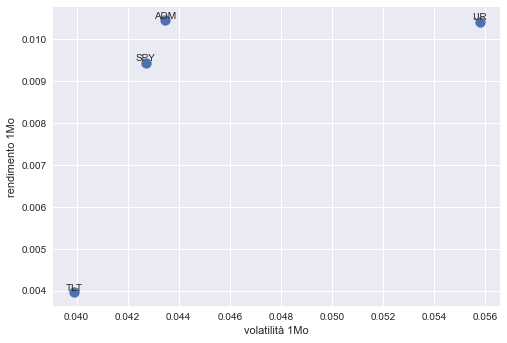

In [13]:
temp=pd.DataFrame([resultsm.mean(),resultsm.std()],index=["rendimento 1Mo","volatilità 1Mo"]).transpose()
temp.plot(kind="scatter",x="volatilità 1Mo",y="rendimento 1Mo",s=100)
for (xi, yi,zi) in zip(temp["volatilità 1Mo"],temp["rendimento 1Mo"],temp.index):
    plt.text(xi, yi, zi, va='bottom', ha='center')

In [14]:
anni=10
results=pd.DataFrame()
for i1 in range(len(df_az.index)-12*anni):
    i2=i1+12*anni
    t1=df_az.iloc[i1].dropna()
    t2=df_az.iloc[i2].dropna()
    #validi=[x for x in t1.index if x in t2.index]
    results.loc[df_az.index[i1], "SPY"] = ((t2["SPY"]/t1["SPY"])**(1/anni)-1)
    results.loc[df_az.index[i1], "IJR"] = ((t2["IJR"]/t1["IJR"])**(1/anni)-1)
    #results.loc[df_az.index[i1], "ADM"] = ((t2["ADM"]/t1["ADM"])**(1/anni)-1)*0.80 #!!!Taxes for strategy 20%!!!
    #results.loc[df_az.index[i1], "ADM"] = ((t2["ADM"]/t1["ADM"])**(1/anni)-1)*0.85 #!!!Taxes for strategy 15%!!!
    #results.loc[df_az.index[i1], "ADM"] = ((t2["ADM"]/t1["ADM"])**(1/anni)-1)*0.90 #!!!Taxes for strategy 10%!!!
    results.loc[df_az.index[i1], "ADM"] = ((t2["ADM"]/t1["ADM"])**(1/anni)-1)
    results.loc[df_az.index[i1], "TLT"] = ((t2["TLT"]/t1["TLT"])**(1/anni)-1)

In [15]:
results.describe()

,SPY,IJR,ADM,TLT
count,130.000000,130.000000,130.000000,130.000000
mean,0.106068,0.108190,0.121749,0.058342
std,0.031690,0.023629,0.022524,0.023521
min,0.063633,0.064121,0.076977,-0.001358
25%,0.075270,0.089411,0.105233,0.051134
50%,0.104968,0.105143,0.119042,0.066182
75%,0.134237,0.124908,0.130208,0.072603
max,0.165487,0.181881,0.181448,0.093942


In [16]:
tick_y=["SPY","IJR","ADM","TLT"]

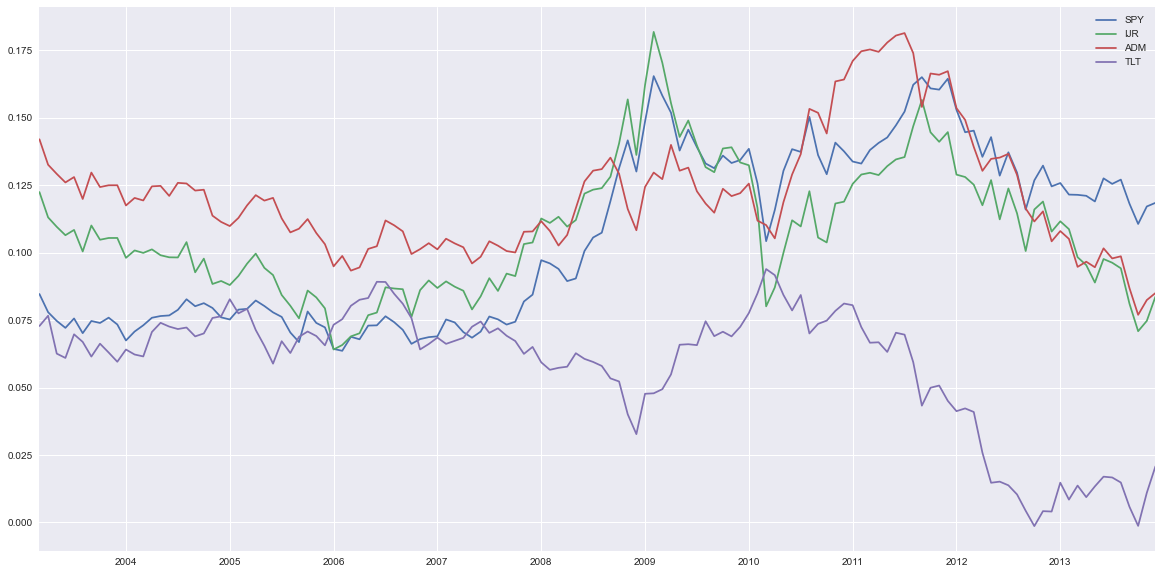

In [17]:
results[tick_y].plot(figsize=(20,10))

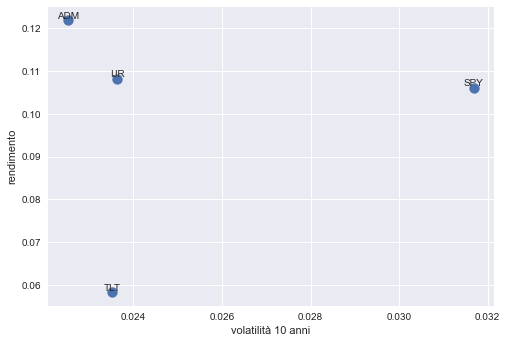

In [18]:
temp=pd.DataFrame([results.mean(),results.std()],index=["rendimento","volatilità 10 anni"]).transpose()
temp.plot(kind="scatter",x="volatilità 10 anni",y="rendimento",s=100)
for (xi, yi,zi) in zip(temp["volatilità 10 anni"],temp["rendimento"],temp.index):
    plt.text(xi, yi, zi, va='bottom', ha='center')

In [19]:


downside_returns = pd.DataFrame()
downside_returns[tick_y] = np.minimum(results[tick_y], 0.10)-0.10 # Seleziona solo i rendimenti sotto media

std_dev_downside = np.std(downside_returns)
mean= [np.mean(results["SPY"]),np.mean(results["IJR"]),np.mean(results["ADM"]),np.mean(results["TLT"]) ]


In [20]:
mean

[0.10606750042643337,
 0.1081901795535098,
 0.12174941926103487,
 0.058342267234194715]

In [21]:
downside_returns.describe()

,SPY,IJR,ADM,TLT
count,130.000000,130.000000,130.000000,130.000000
mean,-0.011683,-0.005618,-0.000848,-0.041658
std,0.013048,0.008815,0.003215,0.023521
min,-0.036367,-0.035879,-0.023023,-0.101358
25%,-0.024730,-0.010589,0.000000,-0.048866
50%,0.000000,0.000000,0.000000,-0.033818
75%,0.000000,0.000000,0.000000,-0.027397
max,0.000000,0.000000,0.000000,-0.006058


In [22]:
sortino = pd.DataFrame()
sortino["DownsideDev"] = std_dev_downside
sortino["Mean"] = mean

In [23]:
sortino

,DownsideDev,Mean
SPY,0.012998,0.106068
IJR,0.008781,0.108190
ADM,0.003202,0.121749
TLT,0.023431,0.058342


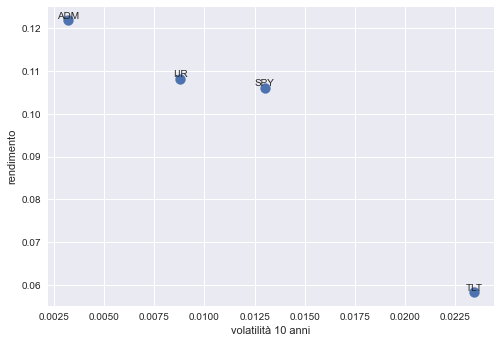

In [26]:
temp=pd.DataFrame([sortino["Mean"],sortino["DownsideDev"]],index=["rendimento","volatilità 10 anni"]).transpose()
temp.plot(kind="scatter",x="volatilità 10 anni",y="rendimento",s=100)
for (xi, yi,zi) in zip(temp["volatilità 10 anni"],temp["rendimento"],temp.index):
    plt.text(xi, yi, zi, va='bottom', ha='center')